In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances 

%matplotlib inline

In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep = '|', names = u_cols, encoding = 'latin-1')
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
# person has rated the movie means he watched the movie will be the principle used for recommendation

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep = '\t', names = r_cols, encoding = 'latin-1')
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('ml-100k/u.item', sep = '|', names = i_cols, encoding='latin-1')
items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
train_df = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
test_df = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
train_df.shape, test_df.shape

((90570, 4), (9430, 4))

In [6]:
# get mean ratings for every movie and it's count

ratings_info = pd.DataFrame(train_df.groupby('movie_id')['rating'].mean())
ratings_info['number_of_ratings'] = train_df.groupby('movie_id')['rating'].count()
ratings_info.head()

,rating,number_of_ratings
movie_id,,
1,3.859694,392
2,3.198347,121
3,3.058824,85
4,3.545455,198
5,3.291139,79


C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

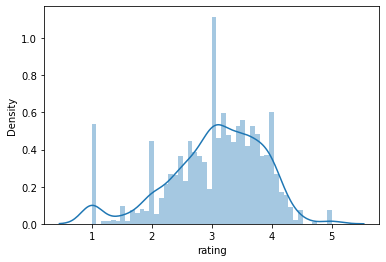

In [7]:
# most of the movies are rated between 2.5 to 4

sns.distplot(ratings_info['rating'], bins = 50)

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_ratings', ylabel='Density'>

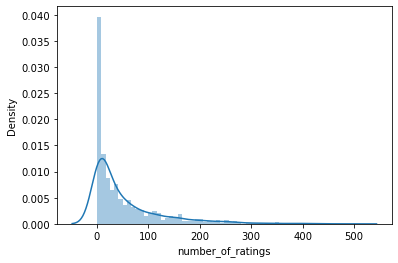

In [8]:
# most movies have few ratings

sns.distplot(ratings_info['number_of_ratings'], bins = 60)

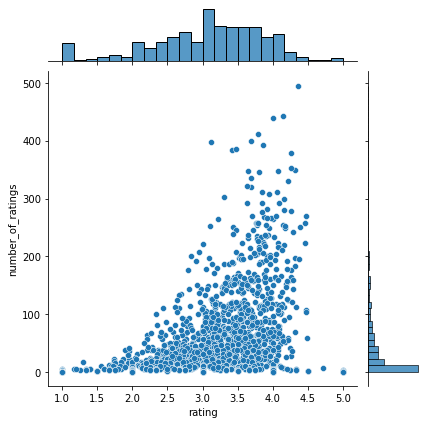

In [9]:
# as more people watch the movie, its average rating increases

sns.jointplot(x = 'rating', y = 'number_of_ratings', data = ratings_info)

In [10]:
# create a user-item matrix to calculate the similarity between users and items

data_matrix = np.array(ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0))

In [11]:
# calculating cosine similarity between user-user and item-item
user_similarity = pairwise_distances(data_matrix, metric = 'cosine')
item_similarity = pairwise_distances(data_matrix.T, metric = 'cosine')

In [12]:
# defining prediction function

def predict(ratings, similarity, type):
    if type == 'user':
        pred = ((similarity.dot(ratings).T) / np.array([np.abs(similarity).sum(axis=1)])).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [13]:
# recommending based on user similarity and item similarity

user_prediction = predict(data_matrix, user_similarity, 'user')
item_prediction = predict(data_matrix, item_similarity, 'item')

In [14]:
user_based_recommendation = np.argsort(-user_prediction, axis = 1)
item_based_recommendation = np.argsort(-item_prediction, axis = 1)

In [15]:
print(user_based_recommendation)

[[  49   99  257 ...  851  598 1625]
 [  49   99  180 ... 1324 1372 1351]
 [  49   99  180 ... 1653 1670 1677]
 ...
 [  49   99  180 ... 1319 1600 1653]
 [  49   99  180 ...  851 1653 1658]
 [  49   99  257 ... 1583 1573 1620]]


In [16]:
print(item_based_recommendation)

[[1386 1383 1553 ...  203  171  173]
 [1573 1565 1562 ...   99  257  285]
 [1553 1208 1581 ...  332  330  327]
 ...
 [1553 1548 1565 ...    6  116    0]
 [1553 1548 1358 ...  171  422  173]
 [1255 1643 1383 ...  171   78  173]]


In [37]:
# matrix factorization for recommender system
# https://albertauyeung.github.io/2017/04/23/python-matrix-factorization.html/

class MF():

    # Constructor
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        
        # Generating random P and Q to start with for gradient descent to converge
        self.P = np.random.normal(scale=1/self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1/self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        # Every user may have his or her own bias tending to rate items higher or lower than the others. If a user is a serious movie watcher, he or she may tend to give lower ratings, when compared to other users
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # Getting non zero elements to act as training samples along with their index
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Training model
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Root mean squared error for non zero elements
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        # beta acts as a regularization parameter to prevent overfitting
        error += (self.beta) * (np.sum(np.linalg.norm(self.P, axis=0)**2) + np.sum(np.linalg.norm(self.Q, axis=0)**2)) / 2
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Formula for ratings for user i and movie j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [39]:
mf = MF(data_matrix, K=20, alpha=0.001, beta=0.01, iterations=200)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())

Iteration: 20 ; error = 296.1406
Iteration: 40 ; error = 291.1050
Iteration: 60 ; error = 287.8044
Iteration: 80 ; error = 282.6697
Iteration: 100 ; error = 273.9072
Iteration: 120 ; error = 263.1425
Iteration: 140 ; error = 252.0235
Iteration: 160 ; error = 241.6294
Iteration: 180 ; error = 232.6062
Iteration: 200 ; error = 225.0916

P x Q:
[[4.34502551 2.91206298 3.16714824 ... 2.9987361  3.37807707 3.31514473]
 [3.72692992 2.92821524 2.66215616 ... 3.3849089  3.46550355 3.43619735]
 [3.9072227  2.63868538 2.3996995  ... 2.74822533 2.92546344 2.90415169]
 ...
 [4.49834243 3.64285109 3.41691037 ... 3.58395831 3.81025044 3.74909171]
 [4.43381354 3.91471875 3.36519867 ... 3.69877484 3.89046664 3.82738373]
 [3.15169199 3.65969519 3.92702267 ... 3.0374727  3.35216962 3.27148751]]


C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


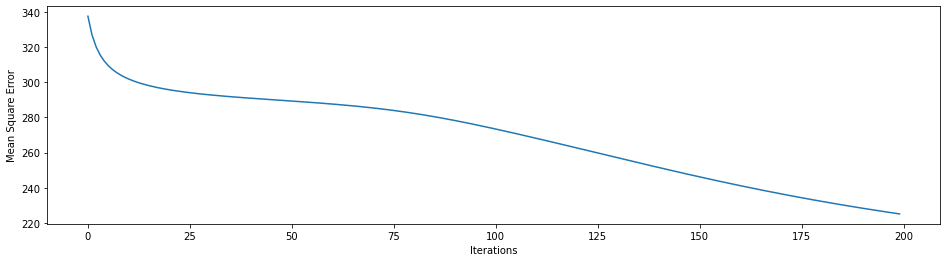

In [40]:
x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((16,4)))
sns.lineplot(x, y)
plt.xlabel("Iterations")
_ = plt.ylabel("Mean Square Error")